In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
#import dataframe
path=r'C:\\Users\\Admin\\London Uk Airbnb'

In [6]:
df = pd.read_csv(os.path.join(path,'Prepared data','data_new.csv'))
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_13836\2955913513.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'Prepared data','data_new.csv'))


,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,50,41870,Room in relaxed family house!,182993,NaN,Waltham Forest,51.558400,0.002580,Private room,37,2,2,2011-07-02,1,0,0
1,372,388306,"Garden flat, Putney",1942893,NaN,Wandsworth,51.460300,-0.220610,Private room,908,1,1,2012-03-26,1,365,0
2,66,306405,Spacious Double Room in East London,1575800,NaN,Barking and Dagenham,51.540720,0.152460,Private room,41,4,3,2012-05-27,1,365,0
3,435,390876,Peaceful Riverside Island Sanctuary,1954980,NaN,Richmond upon Thames,51.425720,-0.310030,Private room,35,3,3,2012-05-31,1,0,0
4,799,553543,Newly furnished flat in Kensington,2720301,NaN,Hammersmith and Fulham,51.490950,-0.206100,Private room,35,14,1,2012-07-17,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,69320,679489255469079962,LUXURY sky-high suite + RIVER + CITY SKYLINE v...,52259351,NaN,Lambeth,51.486185,-0.126897,Entire home/apt,315,1,0,NaN,14,365,0
69347,69329,44639074,Entire lovely family home with garden near London,17343987,NaN,Kingston upon Thames,51.383000,-0.326060,Entire home/apt,110,1,0,NaN,1,0,0
69348,69334,38338919,Loveshack baby!,5005089,NaN,Richmond upon Thames,51.446390,-0.324570,Entire home/apt,210,3,0,NaN,1,0,0
69349,69342,44197476,"Airy, sunlit, lovely apartment with Thames views",266785086,NaN,Tower Hamlets,51.508840,-0.036410,Private room,96,2,0,NaN,1,0,0


In [23]:
# Removing all categorical variables

df.drop(['last_review'], axis = 1, inplace = True)

2 The elbow technique

In [24]:
#Stating by defining the range of the cluster
num_cl = range(1, 20) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [27]:
#creating a score for each of the ranges created..
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-4.87554262658922e+39,
 -2.981256960638006e+37,
 -8.49474760923535e+36,
 -3.966822505016394e+36,
 -2.2432626266662533e+36,
 -1.4628086075004087e+36,
 -1.032593898651916e+36,
 -7.787557498065785e+35,
 -6.131297264093899e+35,
 -4.893442096016815e+35,
 -4.041082487802564e+35,
 -3.3770647544343315e+35,
 -2.8203653590728218e+35,
 -2.4088715848501242e+35,
 -2.079431548554305e+35,
 -1.7965391490617824e+35,
 -1.5460865774674393e+35,
 -1.380944930644407e+35,
 -1.231496330410248e+35]

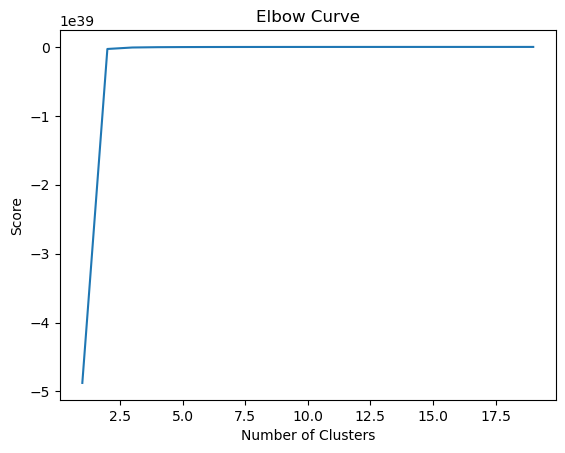

In [28]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
#Based on the elbow, the optimal number of clusters is 3. After value of 3 on the x-axis the curve flattens out.

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,) 

In [32]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [33]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

In [34]:
df.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,clusters
0,41870,51.55840,0.00258,37,2,2,1,0,0,0
1,388306,51.46030,-0.22061,908,1,1,1,365,0,0
2,306405,51.54072,0.15246,41,4,3,1,365,0,0
3,390876,51.42572,-0.31003,35,3,3,1,0,0,0
4,553543,51.49095,-0.20610,35,14,1,1,0,0,0


In [35]:
df['clusters'].value_counts()

0    54604
2     9234
1     5513
Name: clusters, dtype: int64

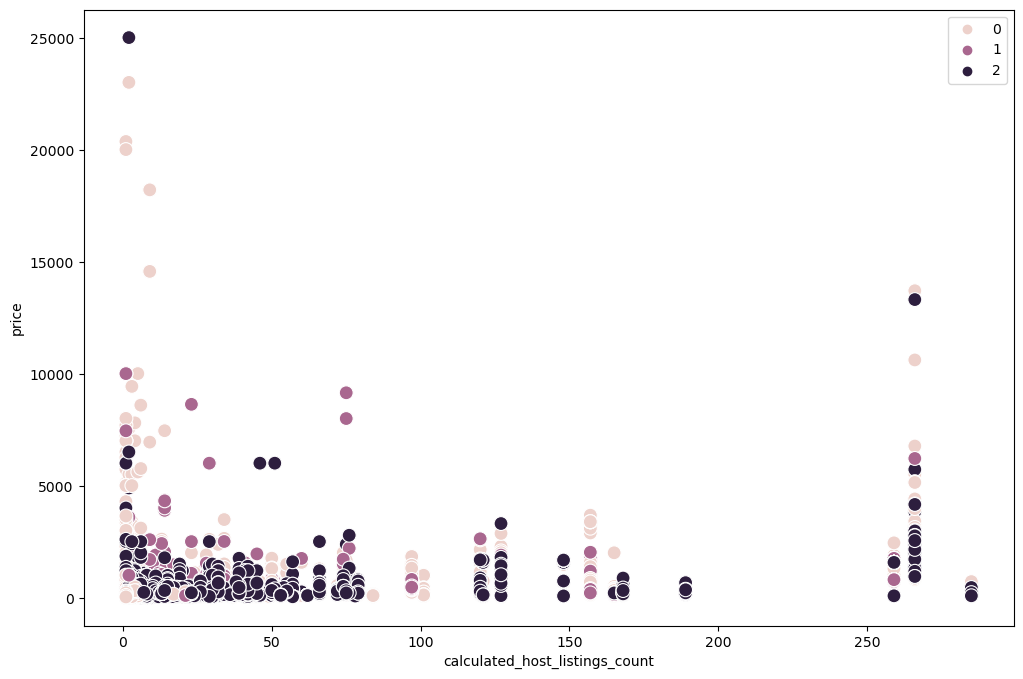

In [41]:

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['calculated_host_listings_count'], y = df['price'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('calculated_host_listings_count')
plt.ylabel('price')
plt.show()

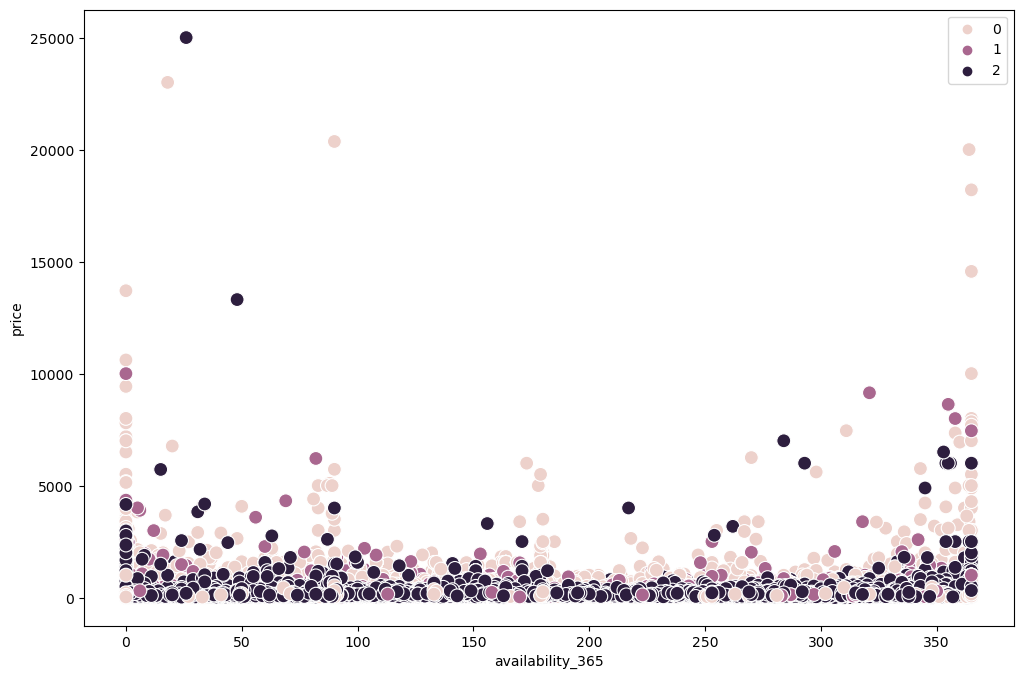

In [47]:
# Plot the clusters for the "Availability_365" and "Price" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['availability_365'], y = df['price'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('availability_365')
plt.ylabel('price')
plt.show()

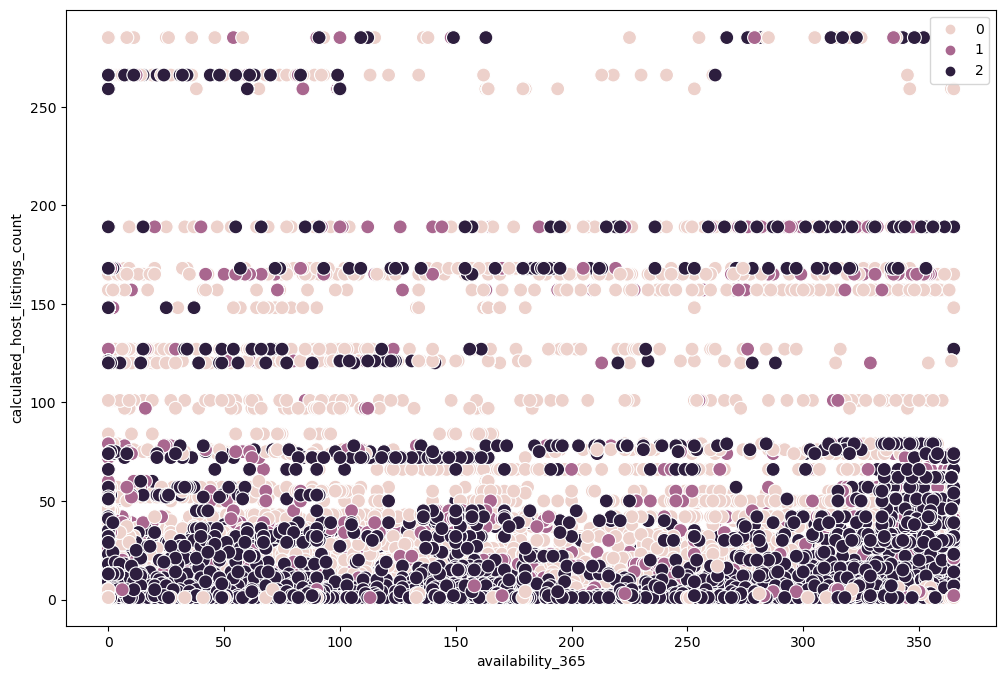

In [48]:
# Plot the clusters for the "Availability_365" and "calculated_host_listings_count" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['availability_365'], y = df['calculated_host_listings_count'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('availability_365')
plt.ylabel('calculated_host_listings_count')
plt.show()

#The first cluster (0) has lower mileage, but also a higher price, while the last cluster (2) has a bigger mileage and a lower price. This is a great division of the clusters as it divided them quite well across the mileage groups.
#For the most part, the purple (cluster 1) cluster has performed the best in all three plots.
#The first cluster, in dark purple (coded as “2” in the legend), is also the most populated cluster. It gathers the data points with calculater host listing count and relatively high prices (with the exclusion of some extreme values at the top and bottom of the price-per-unit range.

In [ ]:
Observations

In [54]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [55]:
df.groupby('clusters').agg({'calculated_host_listings_count':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'price':['mean', 'median']})

calculated_host_listings_count        availability_365         \
                                   mean median             mean median   
clusters                                                                 
0                             10.485312    1.0        85.969361    0.0   
1                             18.430437    3.0       181.090332  171.0   
2                             17.023825    2.0       198.545267  222.0   

               price         
                mean median  
clusters                     
0         162.179785   90.0  
1         234.314711  150.0  
2         231.986896  150.0

The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. It would maybe provide a more holistic view on what in fact influences the Operating Profit variable.
The dark purple cluster has the best stats in almost all categories.